* Nama: Muhammad Agustiawan
* NPM: 40323139
* Kelas: 2TD01

# MK Praktikum Unggulan Universitas Gunadarma
# Mata Kuliah: Praktikum Komputasi Big Data (Tingkat 2)  
---

# Pertemuan VII

Selamat datang pada MK Praktikum Komputasi Big Data pertemuan ke-7. Melanjutkan kegiatan praktikum sebelumnya, pada pertemuan ini Anda akan melanjutkan tahapan pengolahan data yaitu data training dan model generation.



# Import Dataset



In [ ]:
# Import library
import pandas as pd
import numpy as np

# Import dataset
data = pd.read_csv('https://gitlab.com/andreass.bayu/file-directory/-/raw/main/adult.csv')

# Lihat 5 data teratas
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Review Dataset

In [ ]:
# Lihat data deskripsi dari tiap kolom dengan menggunakan fungsi describe
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Lihat tipe data dari tiap kolom dengan menggunakan fungsi dtypes
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
educational-num,int64
marital-status,object
occupation,object
relationship,object
race,object
gender,object


In [ ]:
# Melihat jumlah atribut dan dimensi data (baris dan kolom) dengan menggunakan fungsi shape
data.shape

(48842, 15)

In [ ]:
# Menghitung dan melihat jumlah data per label kelas
for col in data.columns:
  if data[col].dtype == "object":
    print('Attribute name:',col)
    print('-------------------')
    print(data[col].value_counts())
    print('-------------------')

Attribute name: workclass
-------------------
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
-------------------
Attribute name: education
-------------------
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
-------------------
Attribute name: marital-status
-------------------
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed             

<Axes: xlabel='income', ylabel='count'>

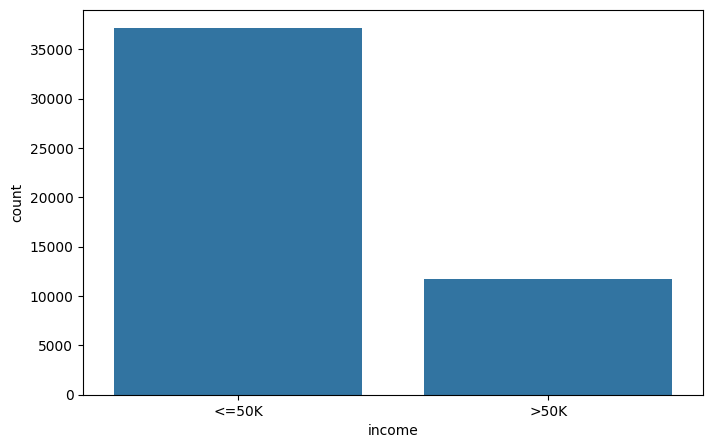

In [ ]:
# Import library seaborn untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plot figure untuk menentukan distribusi kelas
plt.figure(figsize=(8,5))

# Menghitung baris setiap kelas
sns.countplot(x="income", data=data)

**Diketahui bahwa dataset memiliki distribusi kelas yang tidak seimbang (imbalanced) sehingga secara teknis akan digunakan teknik untuk menangani data yang tidak seimbang.**

# Dataset preparation

In [ ]:
# Buat salinan dataframe
df = data.copy(deep = True)

# Mengubah nilai "?" nilai ke bentuk Na / NaN untuk diproses lebih lanjut
for col in data.columns:
  df[[col]] = data[[col]].replace('?',np.NaN)

In [ ]:
# Melakukan seleksi kolom fitur/feature columns dari dataset
null_data = df.iloc[:,:-1]

# Temukan nilai null untuk semua atribut dan jumlahkan total nilai null
null_data.isnull().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2809
relationship,0
race,0
gender,0


In [ ]:
# Hapus/drop semua baris yang memiliki nilai null
df = df.dropna()

# Pilih kolom fitur/feature columns dari dataset
null_data = df.iloc[:,:-1]

# Cek ulang nilai null
null_data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


**StandardScaler** *adalah class dari sklearn untuk melakukan normalisasi data agar data yang digunakan tidak memiliki penyimpangan yang besar.*

In [ ]:
# Import library standard scaler
from sklearn.preprocessing import StandardScaler

# Buat dataframe dengan tipe data int64
colname= []
for col in df.columns:
  if df[col].dtype == "int64":
      colname.append(col)

# Buat salinan dataset untuk keperluan persiapan data (data preparation)
df_copy = df.copy(deep = True)
df_fe = df.copy()

# Buat dataframe untuk fitur kategoris (categorical features)
df_fe.drop('income',axis='columns', inplace=True)
df_fe.drop(colname,axis='columns', inplace=True)

# Buat dataframe untuk kelas target (target class)
df_cl = df.copy()
df_cl.drop(df_copy.iloc[:,:-1],axis='columns', inplace=True)

# Membuat objek scaler (scaler object)
std_scaler = StandardScaler()
std_scaler

# Normalisasikan atribut numerik dan tetapkan ke dalam dataframe baru
df_norm = pd.DataFrame(std_scaler.fit_transform(df_copy[colname]), columns=colname)

In [ ]:
# Import library Ordinal Encoder dari package library sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

# Encode fitur kategoris/categorical features menjadi fitur numerik (numerical features)
for col in df_fe.columns[:]:
  if df_fe[col].dtype == "object":
    df_fe[col] = ord_enc.fit_transform(df_fe[[col]])

# Encode label kategorikal/categorical label menjadi label biner (binary label)
df_cl["income"] = np.where(df_cl["income"].str.contains("> 50K"), 0, 1)

In [ ]:
# Masukkan kolom id ke dataset yang berbeda
df_norm.insert(0, 'id', range(0, 0 + len(df_norm)))
df_fe.insert(0, 'id', range(0, 0 + len(df_fe)))
df_cl.insert(0, 'id', range(0, 0 + len(df_cl)))

# Lihat shapes dataset yang telah di proses
print(df_norm.shape)
print(df_fe.shape)
print(df_cl.shape)

(45222, 7)
(45222, 9)
(45222, 2)


In [ ]:
# Gabungkan semua dataset
df_feature = pd.merge(df_norm,df_fe, on=["id"])
df_final = pd.merge(df_feature,df_cl, on=["id"])

# Drop kolom id dari gabungan dataset
df_final.drop('id',axis='columns', inplace=True)

# Lihat 5 data teratas dari gabungan dataset
df_final.head(5)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120,2.0,1.0,4.0,6.0,3.0,2.0,1.0,38.0,1
1,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701,2.0,11.0,2.0,4.0,0.0,4.0,1.0,38.0,1
2,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120,1.0,7.0,2.0,10.0,0.0,4.0,1.0,38.0,1
3,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120,2.0,15.0,2.0,6.0,0.0,2.0,1.0,38.0,1
4,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942,2.0,0.0,4.0,7.0,1.0,4.0,1.0,38.0,1


# Visualization

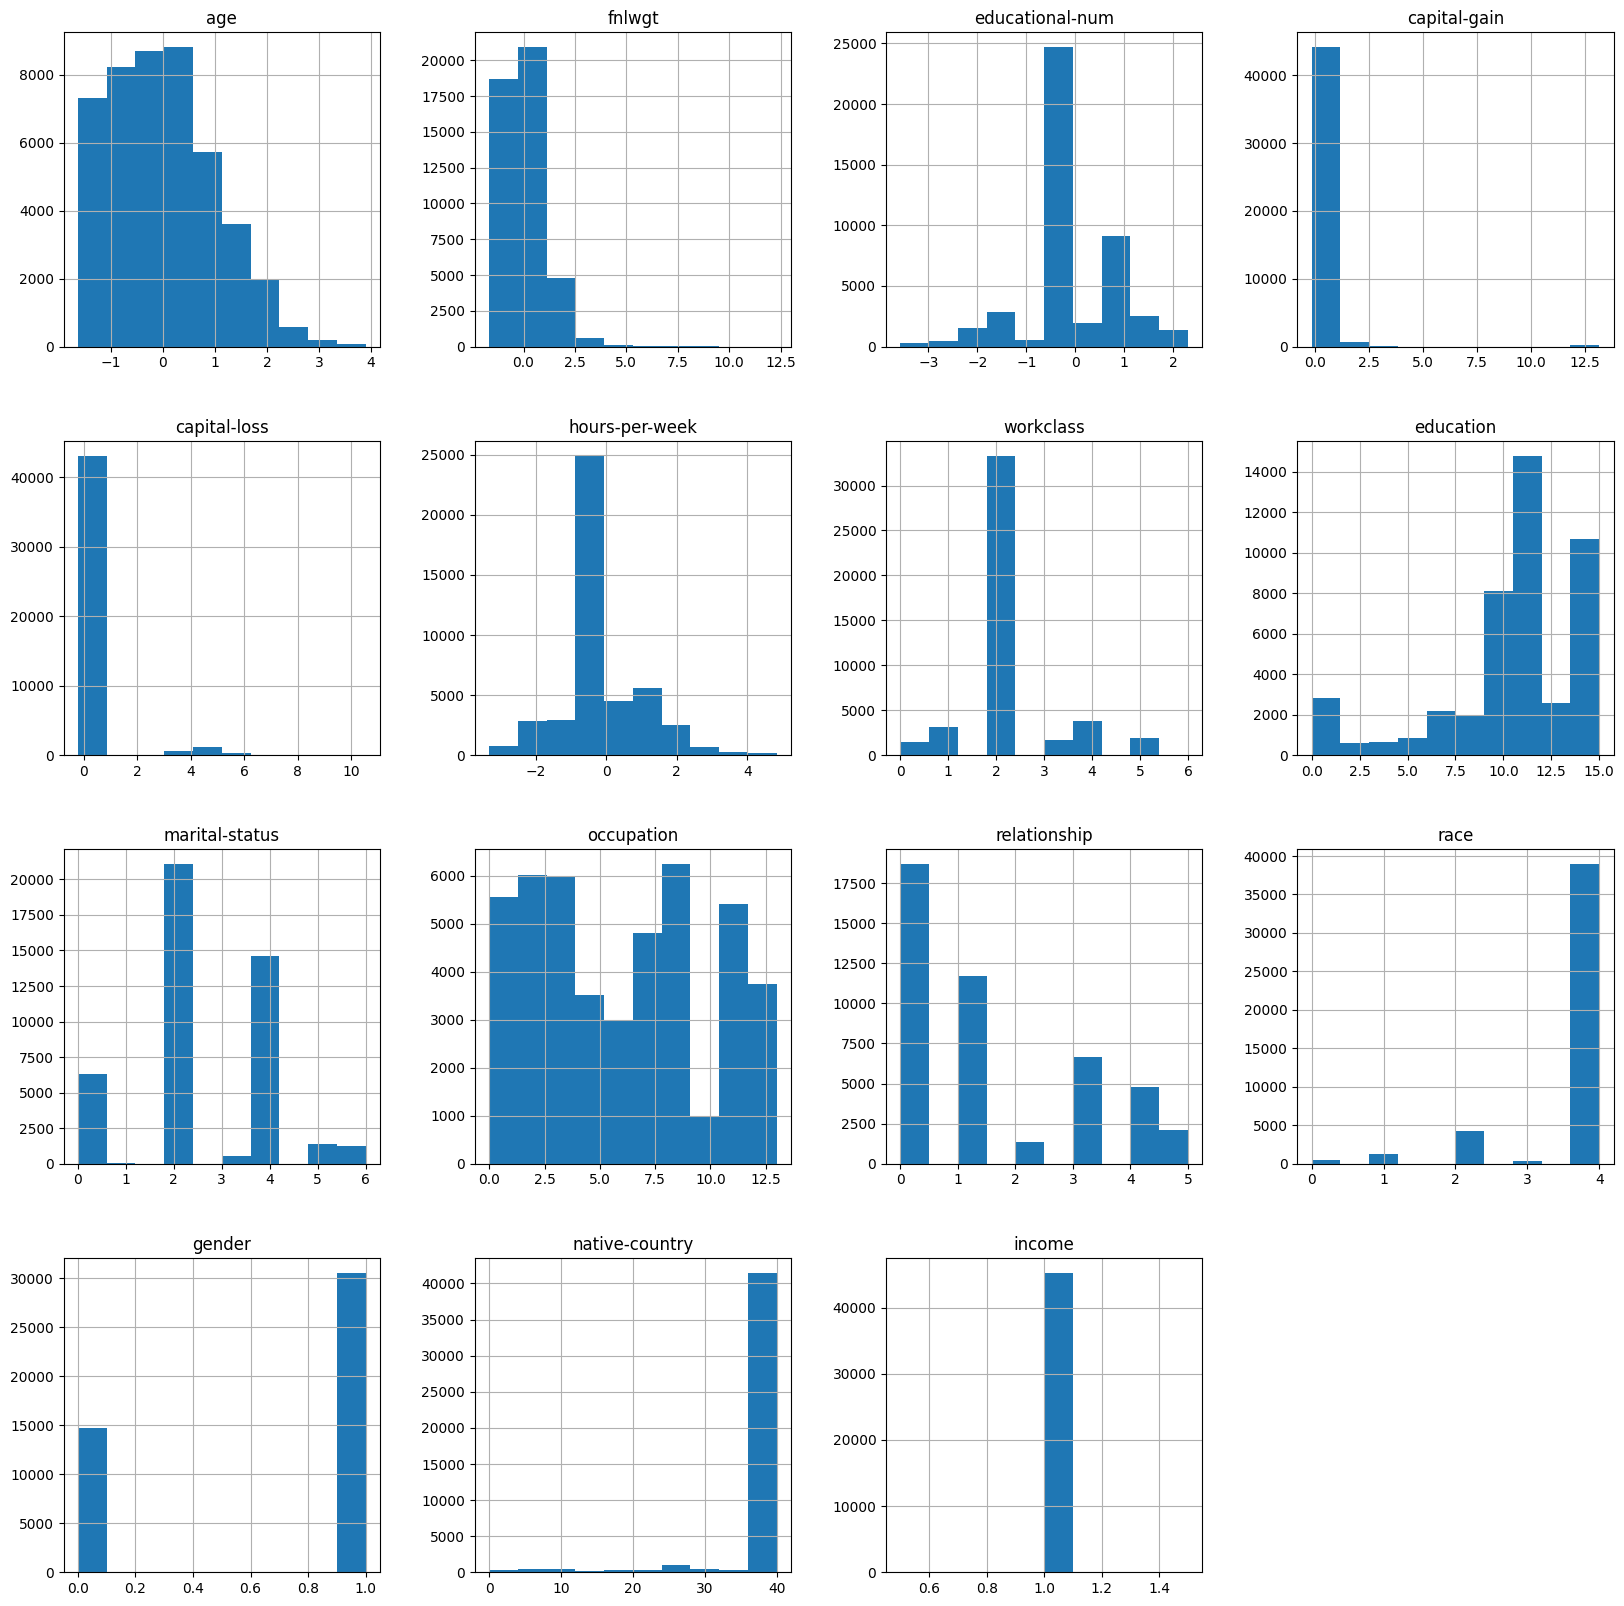

In [ ]:
p = df_final.hist(figsize = (20,20))

**Scatter matrix plot adalah** plot yang digunakan untuk membuat sekumpulan scatter plot dari beberapa pasang variabel. Hal ini sangat bermanfaat terutama ketika ingin menganalisis bagaimana bentuk hubungan antar variabel. Plot ini sangat bermanfaat untuk digunakan untuk data yang ukurannya tidak terlalu besar. Untuk menggunakan scatter matrix kita harus memanggil fungsi *scatter_matrix* dari *pandas.plotting*

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


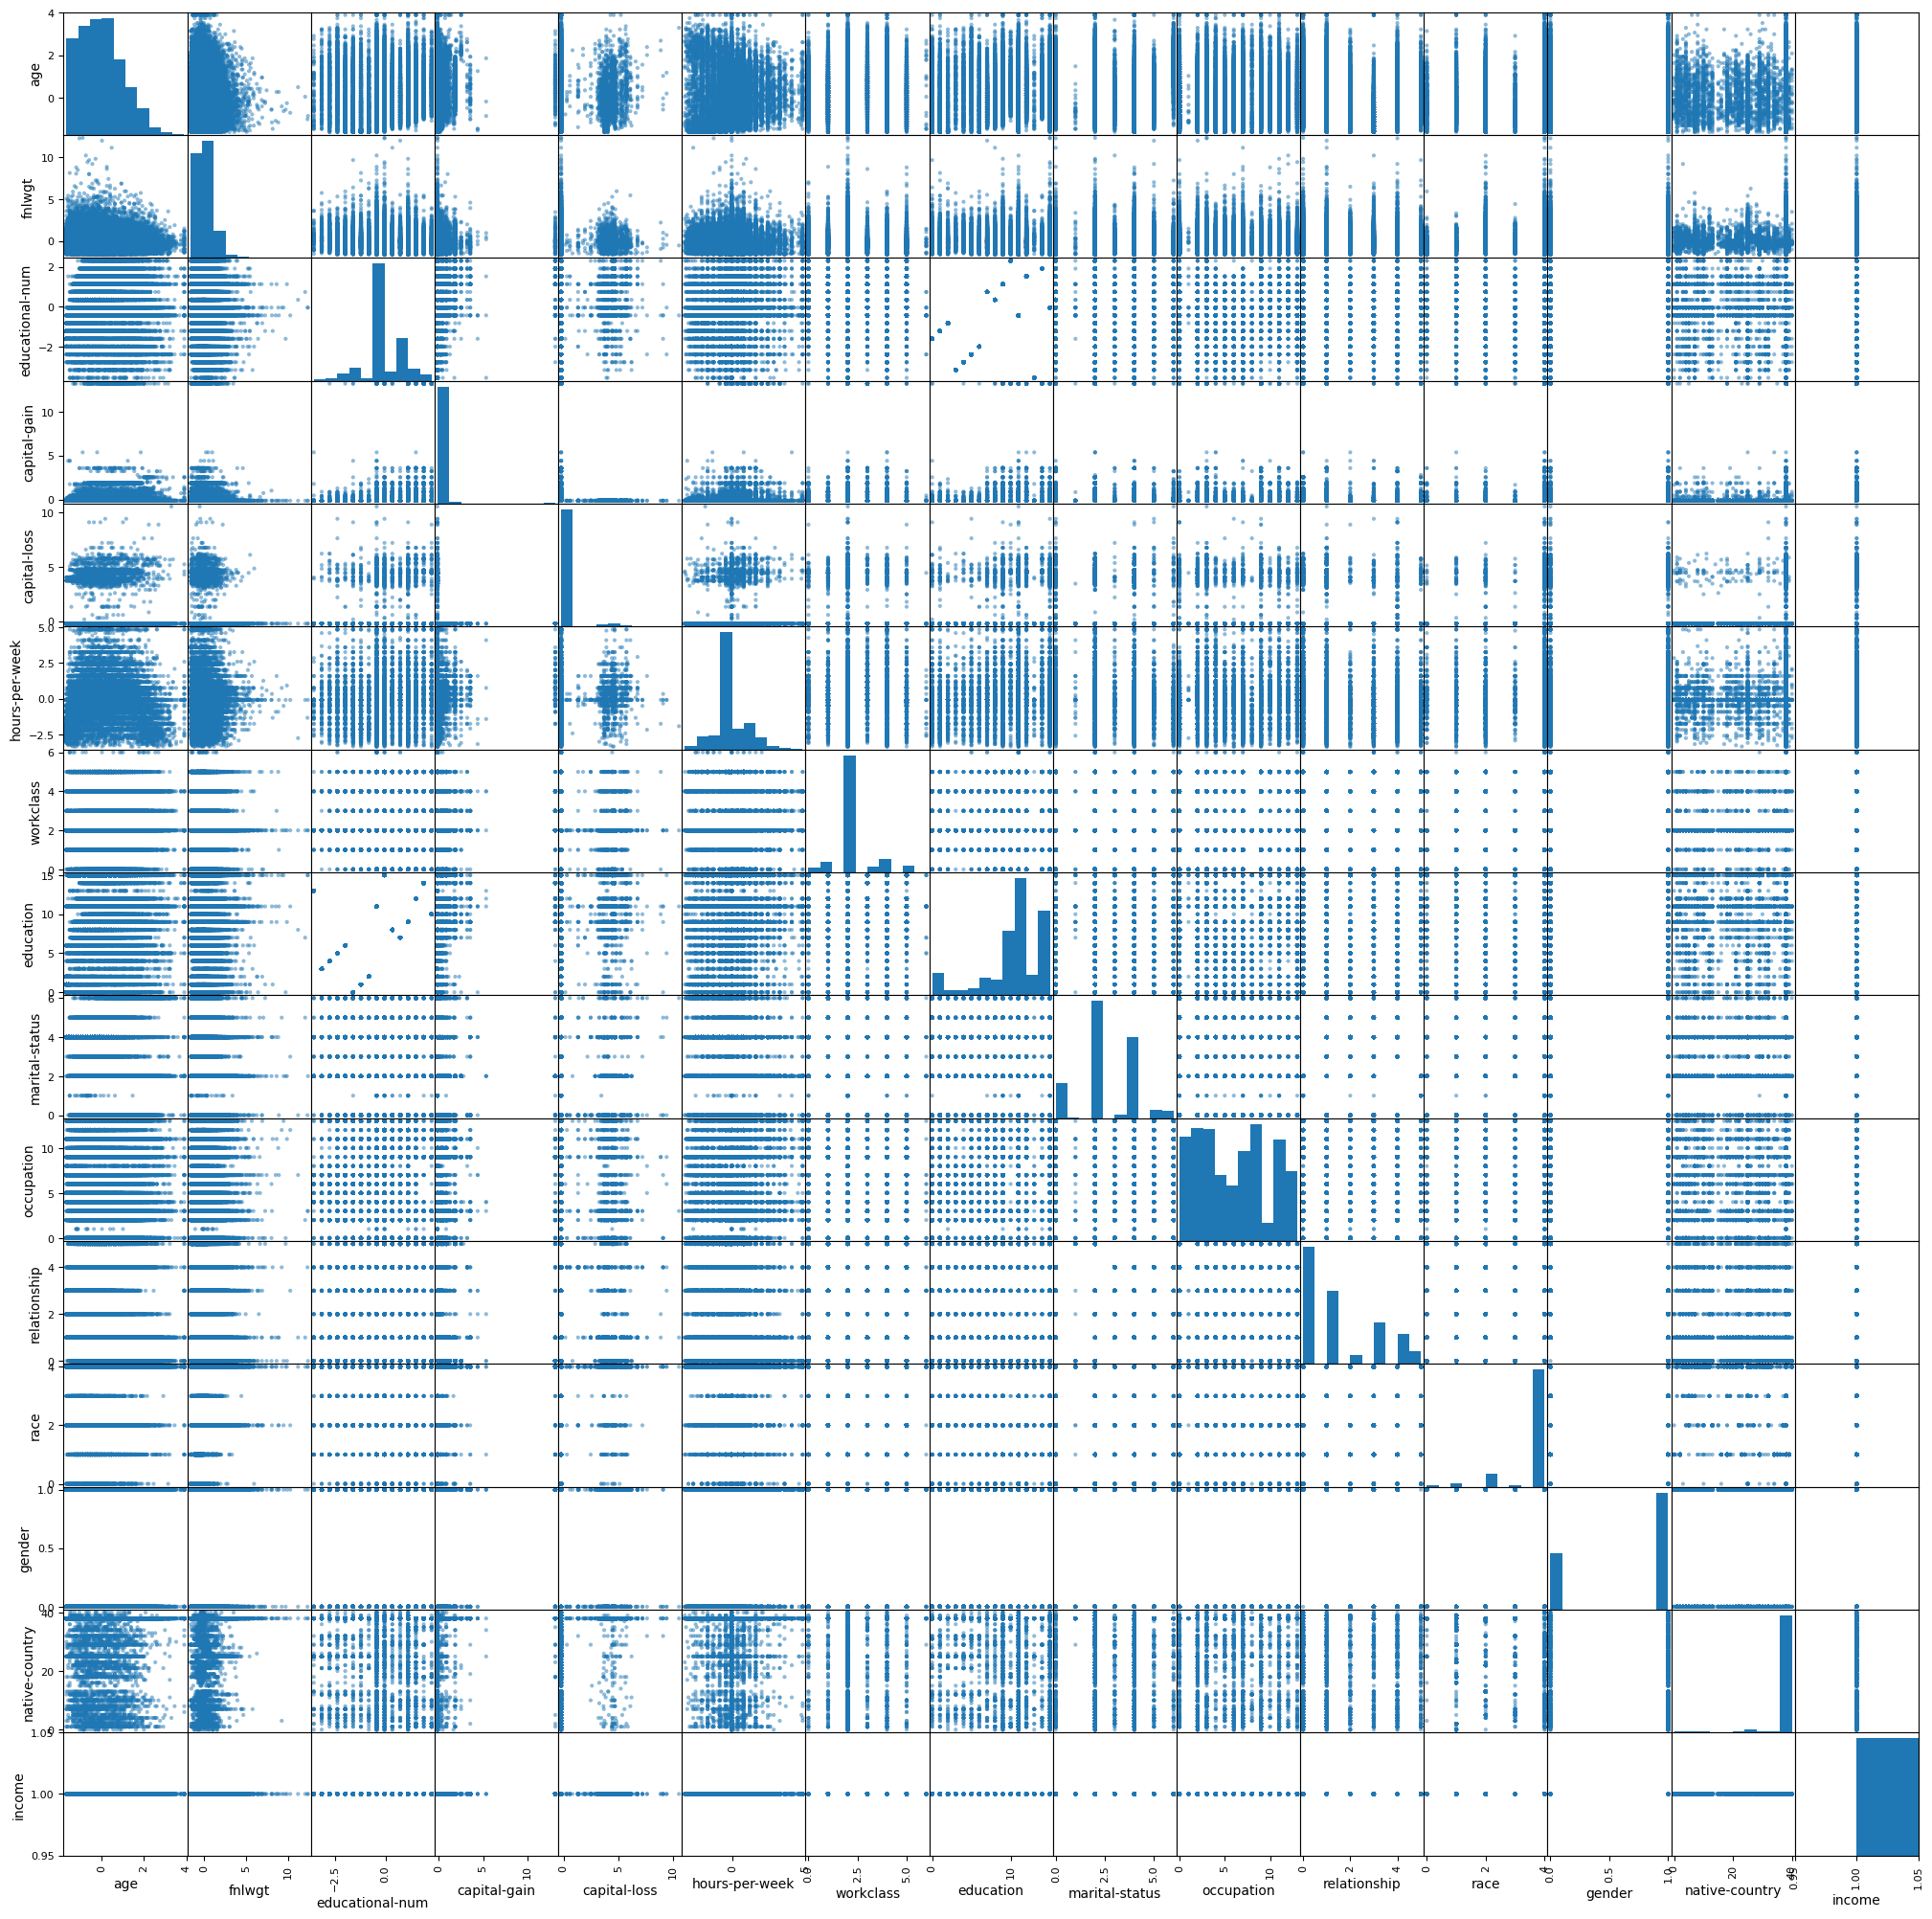

In [ ]:
from pandas.plotting import scatter_matrix

p=scatter_matrix(df_final,figsize=(25, 25))

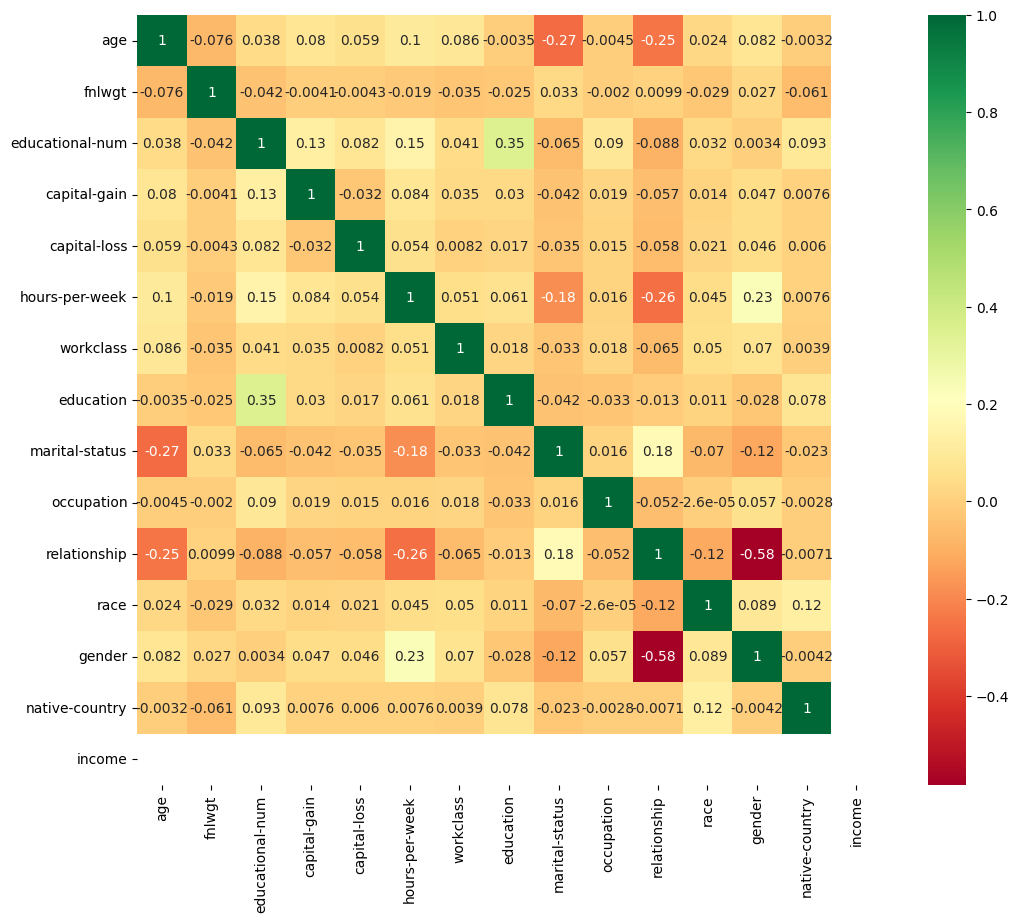

In [ ]:
# Buat visualisasi korelasi data dengan heatmap
import seaborn as sns
import matplotlib.pyplot as plt

 # plot heatmap
plt.figure(figsize=(12,10))
p=sns.heatmap(df_final.corr(), annot=True,cmap ='RdYlGn')

# Proses Modelling dengan KNN

In [ ]:
import numpy as np
from sklearn.model_selection import KFold


X=df_final.iloc[:,:].to_numpy()
y=df_final.iloc[:,-1:].to_numpy()
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf)


for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 9045  9046  9047 ... 45219 45220 45221] TEST: [   0    1    2 ... 9042 9043 9044]
TRAIN: [    0     1     2 ... 45219 45220 45221] TEST: [ 9045  9046  9047 ... 18087 18088 18089]
TRAIN: [    0     1     2 ... 45219 45220 45221] TEST: [18090 18091 18092 ... 27131 27132 27133]
TRAIN: [    0     1     2 ... 45219 45220 45221] TEST: [27134 27135 27136 ... 36175 36176 36177]
TRAIN: [    0     1     2 ... 36175 36176 36177] TEST: [36178 36179 36180 ... 45219 45220 45221]


In [ ]:
print('-------- x axis test ----------')
print(x_test)
print('-------- x axis train ---------')
print(x_train)
print('-------- y axis test ----------')
print(y_test)
print('-------- y axis train ---------')
print(y_train)

print('*******************************')


-------- x axis test ----------
[[ 0.63944887  1.45787715 -0.43812161 ...  1.         38.
   1.        ]
 [ 1.24469679 -1.49349376 -0.046403   ...  1.         38.
   1.        ]
 [-0.26842301 -0.14603391 -0.046403   ...  1.         38.
   1.        ]
 ...
 [ 1.47166476 -0.35805983 -0.43812161 ...  0.         38.
   1.        ]
 [-1.25195088  0.11127873 -0.43812161 ...  1.         38.
   1.        ]
 [ 1.01772882  0.92951628 -0.43812161 ...  0.         38.
   1.        ]]
-------- x axis train ---------
[[-1.02498291  0.35088942 -1.22155881 ...  1.         38.
   1.        ]
 [-0.04145504 -0.94587846 -0.43812161 ...  1.         38.
   1.        ]
 [-0.79801494  1.39359159  0.73703421 ...  1.         38.
   1.        ]
 ...
 [-0.344079   -0.77568407 -0.43812161 ...  1.         10.
   1.        ]
 [ 0.86641684  0.04524191  1.52047141 ...  1.         37.
   1.        ]
 [-0.64670296  0.84029651 -0.43812161 ...  0.         38.
   1.        ]]
-------- y axis test ----------
[[1]
 [1]
 [1]
 

Nilai k KNN yang optimal adalah 1
Skor optimalnya adalah 1.00


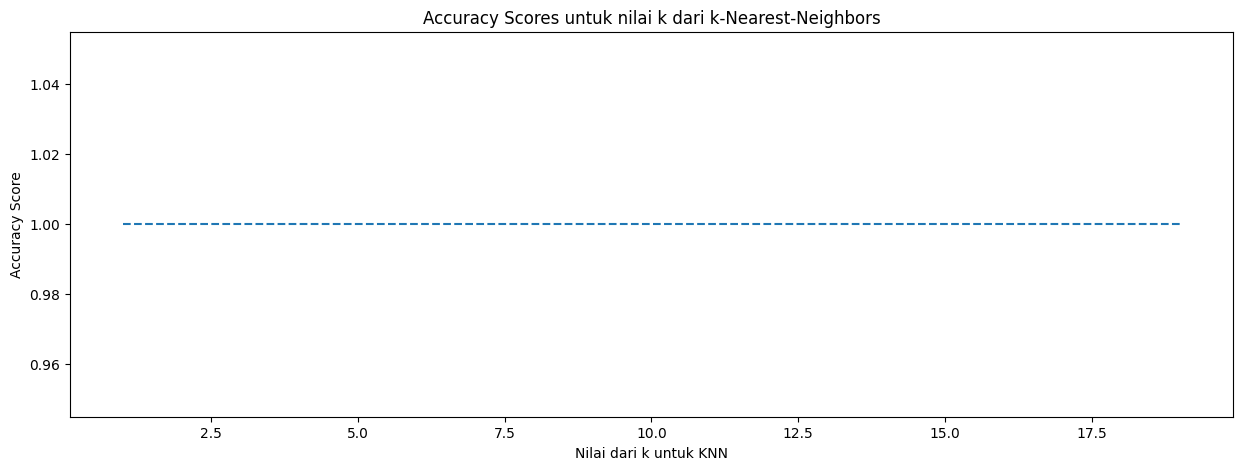

In [ ]:
# Import library model KNN
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Buat variabel kosong untuk menyimpan metrik KNN/KNN metrics
scores=[]

# Kita coba nilai k yang berbeda untuk KNN (dari k=1 sampai k=26)
lrange=list(range(1,20))

# Proses perulangan untuk KNN
for k in lrange:
    knn = KNeighborsClassifier(n_neighbors=k) # Masukkan nilai k dan ukuran 'jarak'
    knn.fit(x_train,y_train.ravel()) # Masukan data train/data latih untuk melatih KNN
    y_pred=knn.predict(x_test) # Lihat prediksi KNN dengan memasukkan data uji
    scores.append(metrics.accuracy_score(y_test,y_pred)) # Tambahkan performance metric akurasi
plt.figure(2,figsize=(15,5))

optimal_k = lrange[scores.index(max(scores))]
print("Nilai k KNN yang optimal adalah %d" % optimal_k)
print("Skor optimalnya adalah %.2f" % max(scores))

# Visualisasikan hasilnya
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Nilai dari k untuk KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores untuk nilai k dari k-Nearest-Neighbors')
plt.show()

**EVALUASI HASIL MATRIKS**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Text(0.5, 23.52222222222222, 'Predicted label')

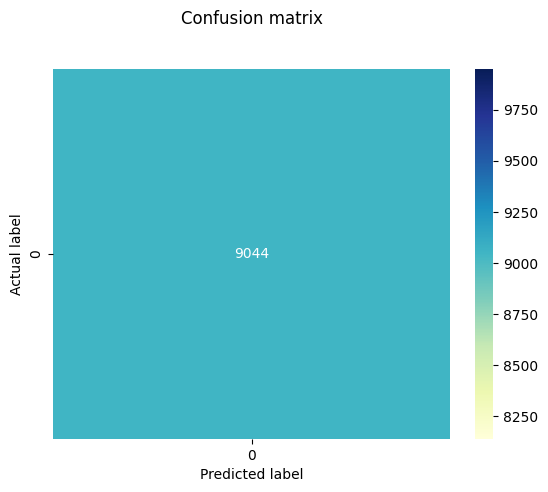

In [ ]:
y_pred = knn.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9044

    accuracy                           1.00      9044
   macro avg       1.00      1.00      1.00      9044
weighted avg       1.00      1.00      1.00      9044



<div class="alert alert-warning">
<strong>Perhatian!</strong> Silahkan ikuti arahan tugas di Virtual Class menggunakan bantuan software word-processing.
    </div>



---


Copyright © 2024 by Pengelola MK Praktikum Unggulan (Praktikum DGX), Universitas Gunadarma


https://www.praktikum-hpc.gunadarma.ac.id/